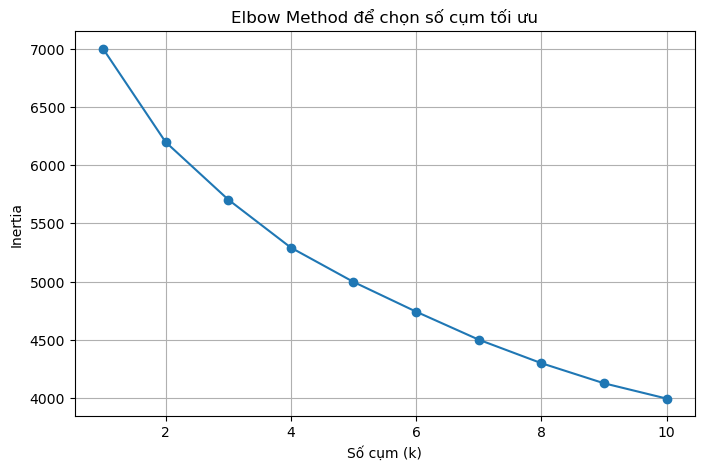

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv('data/data_clean.csv')

# Sao chép dữ liệu để xử lý
df = data.copy()

# Mã hóa cột 'gender' và 'preferred_category'
label_encoders = {}
for col in ['gender', 'preferred_category']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Các cột dùng cho phân cụm
features = [
    'age',
    'gender',
    'spending_score',
    'membership_years',
    'purchase_frequency',
    'preferred_category',
    'last_purchase_amount'
]

X = df[features]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tính Inertia cho các giá trị k khác nhau
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method để chọn số cụm tối ưu')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


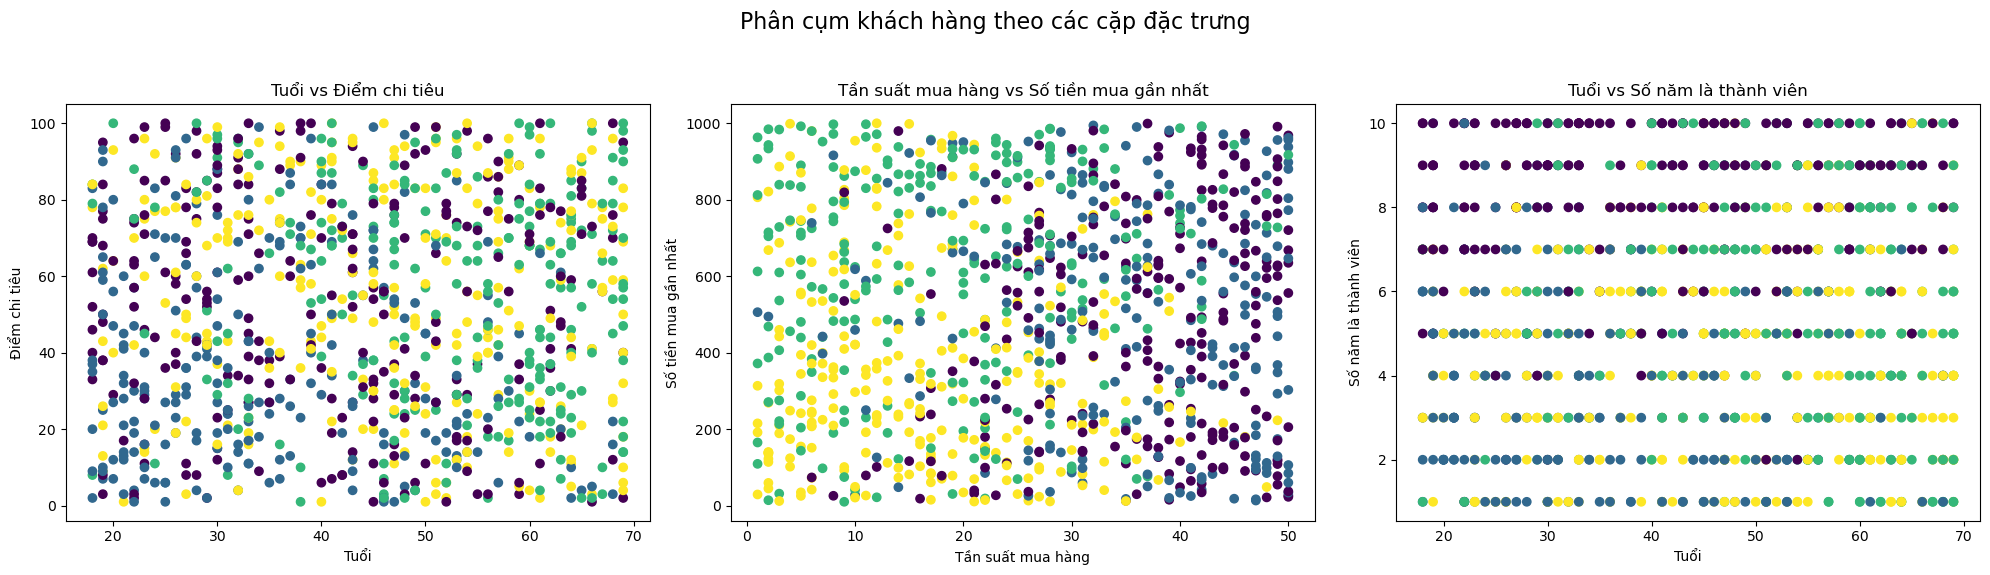

In [3]:
# Giả sử bạn chọn k = 3 từ biểu đồ Elbow
k = 4

# Áp dụng KMeans với k cụm
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Vẽ các biểu đồ phân cụm với các cặp đặc trưng khác nhau
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Tuổi vs Điểm chi tiêu
axes[0].scatter(df['age'], df['spending_score'], c=df['Cluster'], cmap='viridis')
axes[0].set_title('Tuổi vs Điểm chi tiêu')
axes[0].set_xlabel('Tuổi')
axes[0].set_ylabel('Điểm chi tiêu')

# Tần suất mua hàng vs Số tiền mua gần nhất
axes[1].scatter(df['purchase_frequency'], df['last_purchase_amount'], c=df['Cluster'], cmap='viridis')
axes[1].set_title('Tần suất mua hàng vs Số tiền mua gần nhất')
axes[1].set_xlabel('Tần suất mua hàng')
axes[1].set_ylabel('Số tiền mua gần nhất')

# Tuổi vs Số năm là thành viên
axes[2].scatter(df['age'], df['membership_years'], c=df['Cluster'], cmap='viridis')
axes[2].set_title('Tuổi vs Số năm là thành viên')
axes[2].set_xlabel('Tuổi')
axes[2].set_ylabel('Số năm là thành viên')

plt.suptitle('Phân cụm khách hàng theo các cặp đặc trưng', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
